In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('Housing.csv')
df_encoded=pd.get_dummies(df, drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split

In [26]:

X=df_encoded.drop('price', axis=1)
y=df_encoded['price']
X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (436, 13)
Testing set shape: (109, 13)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R² score): {r2:.2f}")


Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R-squared (R² score): 0.65


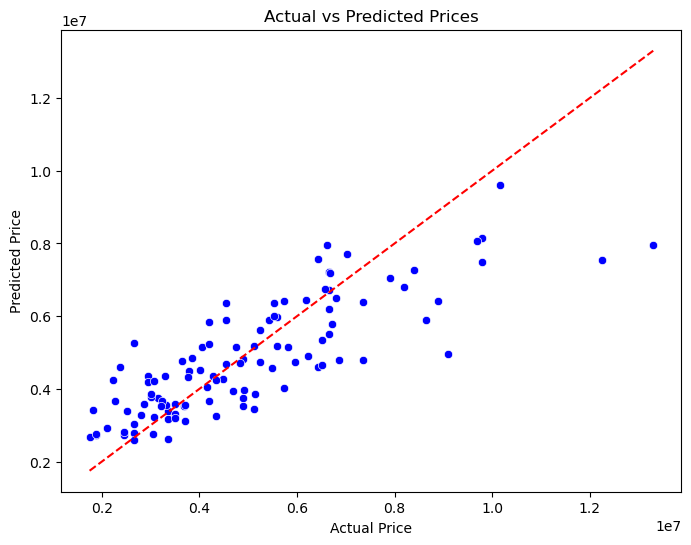

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [24]:
# Show feature importance
coefficients=pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values())

furnishingstatus_unfurnished      -4.136451e+05
furnishingstatus_semi-furnished   -1.268818e+05
area                               2.359688e+02
bedrooms                           7.677870e+04
parking                            2.248419e+05
guestroom_yes                      2.316100e+05
mainroad_yes                       3.679199e+05
basement_yes                       3.902512e+05
stories                            4.074766e+05
prefarea_yes                       6.298906e+05
hotwaterheating_yes                6.846499e+05
airconditioning_yes                7.914267e+05
bathrooms                          1.094445e+06
dtype: float64
